In [2]:
!pip install tensorflow  opencv-python mediapipe  matplotlib scikit-learn

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_landmarks(frame, results)

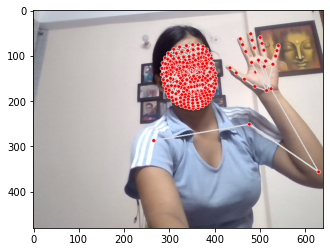

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.5535028 ,  0.30274227, -0.96738356, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.5535028 ,  0.30274227, -0.96738356, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [54]:
cap.release()
cv2.destroyAllWindows()

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(5, 3)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [58]:
res = [.7, 0.2, 0.1]

In [59]:
actions[np.argmax(res)]

'hello'

In [60]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 75ms/step - loss: 2.8459 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.7331 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.5787 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.4249 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.5501 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.6724 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2055 - categorical_accuracy: 0.2471
Epoch 8/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1436 - categorical_accuracy: 0.4235
Epoch 9/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0225 - categorical_accuracy: 0.5647
E

3/3 [==============================] - 0s 92ms/step - loss: 0.3970 - categorical_accuracy: 0.9882
Epoch 147/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.2796 - categorical_accuracy: 0.8588
Epoch 148/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.2262 - categorical_accuracy: 0.9059
Epoch 149/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.6804 - categorical_accuracy: 0.7529
Epoch 150/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.6358 - categorical_accuracy: 0.8000
Epoch 151/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.9624 - categorical_accuracy: 0.3647
Epoch 152/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.6459 - categorical_accuracy: 0.3529
Epoch 153/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1034 - categorical_accuracy: 0.3529
Epoch 154/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0266 - categorical_accuracy: 0.54

3/3 [==============================] - 0s 97ms/step - loss: 1.5376 - categorical_accuracy: 0.3529
Epoch 291/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0693 - categorical_accuracy: 0.3647
Epoch 292/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0705 - categorical_accuracy: 0.3647
Epoch 293/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0833 - categorical_accuracy: 0.3529
Epoch 294/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0826 - categorical_accuracy: 0.3529
Epoch 295/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0747 - categorical_accuracy: 0.3647
Epoch 296/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0676 - categorical_accuracy: 0.3647
Epoch 297/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0646 - categorical_accuracy: 0.3882
Epoch 298/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0569 - categorical_accuracy: 0.482

3/3 [==============================] - 0s 102ms/step - loss: 0.9766 - categorical_accuracy: 0.5647
Epoch 435/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9836 - categorical_accuracy: 0.4471
Epoch 436/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9847 - categorical_accuracy: 0.5412
Epoch 437/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0437 - categorical_accuracy: 0.3765
Epoch 438/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0466 - categorical_accuracy: 0.3765
Epoch 439/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0468 - categorical_accuracy: 0.3765
Epoch 440/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0468 - categorical_accuracy: 0.3765
Epoch 441/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0468 - categorical_accuracy: 0.3765
Epoch 442/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0468 - categorical_accuracy

3/3 [==============================] - 0s 102ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 579/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0456 - categorical_accuracy: 0.3294
Epoch 580/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 581/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 582/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 583/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 584/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 585/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 586/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0456 - categorical_accuracy

3/3 [==============================] - 0s 98ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 723/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 724/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 725/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 726/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 727/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0455 - categorical_accuracy: 0.3765
Epoch 728/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0456 - categorical_accuracy: 0.3765
Epoch 729/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0456 - categorical_accuracy: 0.3294
Epoch 730/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0455 - categorical_accuracy: 0.376

3/3 [==============================] - 0s 93ms/step - loss: 1.0443 - categorical_accuracy: 0.3765
Epoch 867/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0442 - categorical_accuracy: 0.3529
Epoch 868/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0441 - categorical_accuracy: 0.3647
Epoch 869/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0440 - categorical_accuracy: 0.3529
Epoch 870/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0440 - categorical_accuracy: 0.3529
Epoch 871/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0438 - categorical_accuracy: 0.3412
Epoch 872/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0438 - categorical_accuracy: 0.3529
Epoch 873/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0437 - categorical_accuracy: 0.3529
Epoch 874/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0436 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 99ms/step - loss: 1.0837 - categorical_accuracy: 0.3529
Epoch 1011/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0834 - categorical_accuracy: 0.3529
Epoch 1012/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0829 - categorical_accuracy: 0.3529
Epoch 1013/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0823 - categorical_accuracy: 0.3529
Epoch 1014/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0821 - categorical_accuracy: 0.3529
Epoch 1015/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0816 - categorical_accuracy: 0.3529
Epoch 1016/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0811 - categorical_accuracy: 0.3529
Epoch 1017/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0808 - categorical_accuracy: 0.3529
Epoch 1018/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0805 - categorical_accurac

Epoch 1153/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5168 - categorical_accuracy: 0.6706
Epoch 1154/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4998 - categorical_accuracy: 0.6588
Epoch 1155/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7650 - categorical_accuracy: 0.7176
Epoch 1156/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.4934 - categorical_accuracy: 0.7059
Epoch 1157/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.4773 - categorical_accuracy: 0.6706
Epoch 1158/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4748 - categorical_accuracy: 0.6941
Epoch 1159/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.4810 - categorical_accuracy: 0.6941
Epoch 1160/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4983 - categorical_accuracy: 0.6941
Epoch 1161/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5073

3/3 [==============================] - 0s 93ms/step - loss: 0.2160 - categorical_accuracy: 0.8941
Epoch 1296/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1010 - categorical_accuracy: 0.9882
Epoch 1297/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1655 - categorical_accuracy: 0.9647
Epoch 1298/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0792 - categorical_accuracy: 0.9765
Epoch 1299/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0864 - categorical_accuracy: 0.9765
Epoch 1300/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0667 - categorical_accuracy: 0.9882
Epoch 1301/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0448 - categorical_accuracy: 0.9882
Epoch 1302/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0459 - categorical_accuracy: 0.9882
Epoch 1303/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0249 - categorical_accurac

3/3 [==============================] - 0s 95ms/step - loss: 3.2470e-05 - categorical_accuracy: 1.0000
Epoch 1435/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.1769e-05 - categorical_accuracy: 1.0000
Epoch 1436/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.1620e-05 - categorical_accuracy: 1.0000
Epoch 1437/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.1271e-05 - categorical_accuracy: 1.0000
Epoch 1438/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.0686e-05 - categorical_accuracy: 1.0000
Epoch 1439/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0606e-05 - categorical_accuracy: 1.0000
Epoch 1440/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.9849e-05 - categorical_accuracy: 1.0000
Epoch 1441/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.9982e-05 - categorical_accuracy: 1.0000
Epoch 1442/2000
3/3 [==============================] - 0s 95ms/step - lo

3/3 [==============================] - 0s 94ms/step - loss: 1.0234e-05 - categorical_accuracy: 1.0000
Epoch 1573/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0105e-05 - categorical_accuracy: 1.0000
Epoch 1574/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0221e-05 - categorical_accuracy: 1.0000
Epoch 1575/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0038e-05 - categorical_accuracy: 1.0000
Epoch 1576/2000
3/3 [==============================] - 0s 92ms/step - loss: 9.9508e-06 - categorical_accuracy: 1.0000
Epoch 1577/2000
3/3 [==============================] - 0s 89ms/step - loss: 9.9311e-06 - categorical_accuracy: 1.0000
Epoch 1578/2000
3/3 [==============================] - 0s 90ms/step - loss: 9.9549e-06 - categorical_accuracy: 1.0000
Epoch 1579/2000
3/3 [==============================] - 0s 90ms/step - loss: 9.9072e-06 - categorical_accuracy: 1.0000
Epoch 1580/2000
3/3 [==============================] - 0s 90ms/step - lo

3/3 [==============================] - 0s 101ms/step - loss: 6.0437e-06 - categorical_accuracy: 1.0000
Epoch 1711/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.0114e-06 - categorical_accuracy: 1.0000
Epoch 1712/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.9876e-06 - categorical_accuracy: 1.0000
Epoch 1713/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.9960e-06 - categorical_accuracy: 1.0000
Epoch 1714/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9722e-06 - categorical_accuracy: 1.0000
Epoch 1715/2000
3/3 [==============================] - 0s 100ms/step - loss: 5.9455e-06 - categorical_accuracy: 1.0000
Epoch 1716/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9315e-06 - categorical_accuracy: 1.0000
Epoch 1717/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.9441e-06 - categorical_accuracy: 1.0000
Epoch 1718/2000
3/3 [==============================] - 0s 96ms/step - 

3/3 [==============================] - 0s 98ms/step - loss: 4.1018e-06 - categorical_accuracy: 1.0000
Epoch 1849/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.0527e-06 - categorical_accuracy: 1.0000
Epoch 1850/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.0401e-06 - categorical_accuracy: 1.0000
Epoch 1851/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.0289e-06 - categorical_accuracy: 1.0000
Epoch 1852/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.0190e-06 - categorical_accuracy: 1.0000
Epoch 1853/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.0331e-06 - categorical_accuracy: 1.0000
Epoch 1854/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.9938e-06 - categorical_accuracy: 1.0000
Epoch 1855/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.9840e-06 - categorical_accuracy: 1.0000
Epoch 1856/2000
3/3 [==============================] - 0s 99ms/step - lo

3/3 [==============================] - 0s 98ms/step - loss: 2.8300e-06 - categorical_accuracy: 1.0000
Epoch 1987/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.8215e-06 - categorical_accuracy: 1.0000
Epoch 1988/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.8019e-06 - categorical_accuracy: 1.0000
Epoch 1989/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.8089e-06 - categorical_accuracy: 1.0000
Epoch 1990/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.7865e-06 - categorical_accuracy: 1.0000
Epoch 1991/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.7893e-06 - categorical_accuracy: 1.0000
Epoch 1992/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.7851e-06 - categorical_accuracy: 1.0000
Epoch 1993/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.7612e-06 - categorical_accuracy: 1.0000
Epoch 1994/2000
3/3 [==============================] - 0s 95ms/step - lo

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [63]:
res = model.predict(X_test)

1/1 [==============================] - 0s 442ms/step


In [64]:
actions[np.argmax(res[4])]

'thanks'

In [65]:
actions[np.argmax(y_test[4])]

'thanks'

In [66]:
model.save('action.h5')

In [54]:
del model

In [67]:
model.load_weights('action.h5')

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [70]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [71]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [72]:
accuracy_score(ytrue, yhat)

0.8

In [76]:
from scipy import stats


In [77]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [78]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))